In [7]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt


In [8]:

# Set your data directory
data_dir = 'train'


In [9]:


# Data Preprocessing
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 1900 images belonging to 5 classes.


Found 474 images belonging to 5 classes.


In [10]:

# Model Architecture (Using MobileNetV2 as an example)
base_model = tf.keras.applications.MobileNetV2(input_shape=(224, 224, 3),
                                               include_top=False,
                                               weights='imagenet')
base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(len(train_generator.class_indices), activation='softmax')
])


In [11]:

# Model Compilation
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [12]:

# Model Training
history = model.fit(train_generator, epochs=10, validation_data=validation_generator)


Epoch 1/10
60/60 [==============================] - 63s 850ms/step - loss: 0.0931 - accuracy: 0.9674 - val_loss: 7.4668e-04 - val_accuracy: 1.0000
Epoch 2/10
60/60 [==============================] - 46s 754ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 3.4191e-04 - val_accuracy: 1.0000
Epoch 3/10
60/60 [==============================] - 45s 749ms/step - loss: 7.6146e-04 - accuracy: 1.0000 - val_loss: 2.1952e-04 - val_accuracy: 1.0000
Epoch 4/10
60/60 [==============================] - 45s 755ms/step - loss: 5.7887e-04 - accuracy: 1.0000 - val_loss: 1.5938e-04 - val_accuracy: 1.0000
Epoch 5/10
60/60 [==============================] - 46s 771ms/step - loss: 4.1376e-04 - accuracy: 1.0000 - val_loss: 1.2454e-04 - val_accuracy: 1.0000
Epoch 6/10
60/60 [==============================] - 46s 775ms/step - loss: 3.1293e-04 - accuracy: 1.0000 - val_loss: 9.6406e-05 - val_accuracy: 1.0000
Epoch 7/10
60/60 [==============================] - 48s 804ms/step - loss: 3.0656e-04 - accuracy: 1.00

In [13]:

# Model Evaluation
test_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

eval_result = model.evaluate(test_generator)
print("Test Accuracy:", eval_result[1])


Found 474 images belonging to 5 classes.
15/15 [==============================] - 11s 706ms/step - loss: 4.0456e-05 - accuracy: 1.0000
Test Accuracy: 1.0


In [14]:

# Classification Report and Confusion Matrix
y_true = test_generator.classes
y_pred = np.argmax(model.predict(test_generator), axis=1)

class_labels = list(test_generator.class_indices.keys())

print("Classification Report:\n", classification_report(y_true, y_pred, target_names=class_labels))
print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))


15/15 [==============================] - 14s 710ms/step
Classification Report:
               precision    recall  f1-score   support

     Avocado       0.19      0.19      0.19        85
      Banana       0.20      0.20      0.20        98
       Mango       0.22      0.22      0.22        98
 Pomegranate       0.23      0.23      0.23        98
  Watermelon       0.17      0.17      0.17        95

    accuracy                           0.20       474
   macro avg       0.20      0.20      0.20       474
weighted avg       0.20      0.20      0.20       474

Confusion Matrix:
 [[16 20 14 16 19]
 [14 20 23 21 20]
 [13 20 22 22 21]
 [26 11 19 23 19]
 [16 27 20 16 16]]


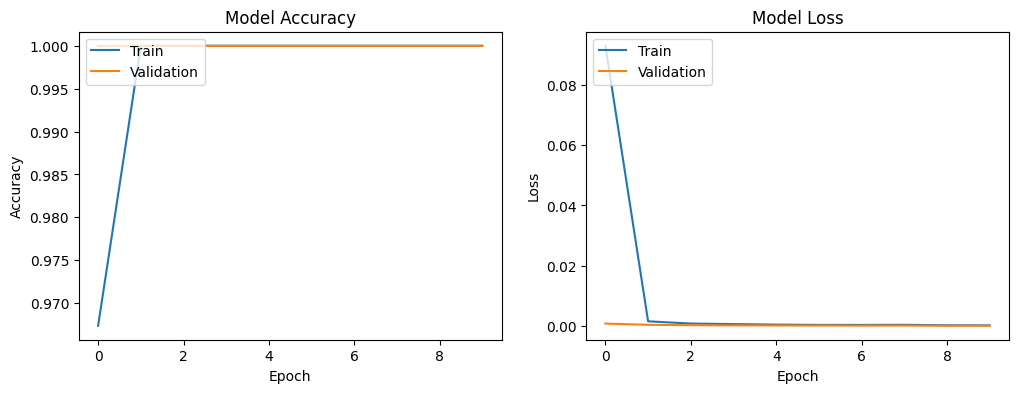

In [15]:

# Visualize Training/Validation Loss and Accuracy
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


1/1 [==============================] - 4s 4s/step


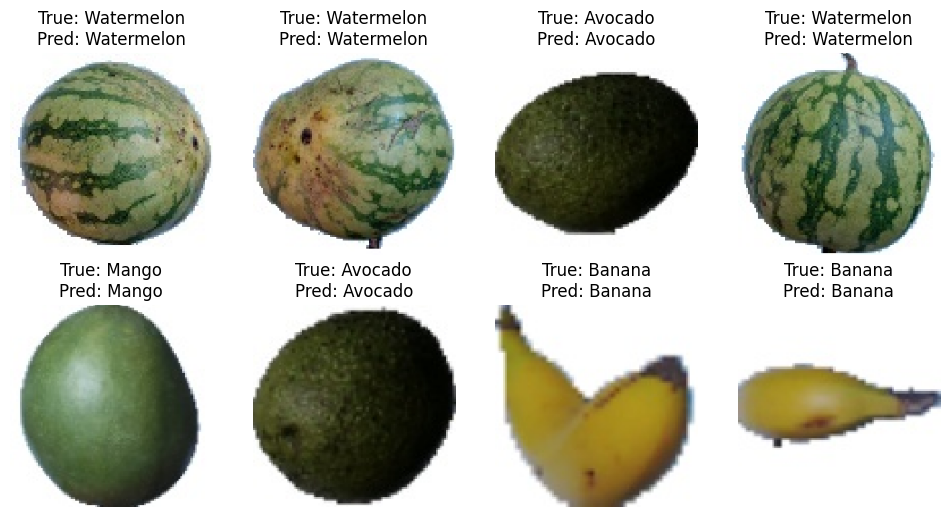

<Figure size 1200x600 with 0 Axes>

In [16]:
# Visualize Sample Predictions
sample_images, sample_labels = next(test_generator)

predictions = model.predict(sample_images)
predicted_labels = np.argmax(predictions, axis=1)

class_names = list(test_generator.class_indices.keys())

plt.figure(figsize=(12, 6))
for i in range(8):  # Displaying predictions for 8 samples
    plt.subplot(2, 4, i + 1)
    plt.imshow(sample_images[i])
    plt.title(f"True: {class_names[np.argmax(sample_labels[i])]}\nPred: {class_names[predicted_labels[i]]}")
    plt.axis('off')

plt.show()

# Explore Misclassified Images
misclassified_images = []
misclassified_labels_true = []
misclassified_labels_pred = []

for i in range(len(sample_labels)):
    true_label = np.argmax(sample_labels[i])
    pred_label = predicted_labels[i]

    if true_label != pred_label:
        misclassified_images.append(sample_images[i])
        misclassified_labels_true.append(class_names[true_label])
        misclassified_labels_pred.append(class_names[pred_label])

plt.figure(figsize=(12, 6))
for i in range(len(misclassified_images)):
    plt.subplot(2, len(misclassified_images) // 2, i + 1)
    plt.imshow(misclassified_images[i])
    plt.title(f"True: {misclassified_labels_true[i]}\nPred: {misclassified_labels_pred[i]}")
    plt.axis('off')

plt.show()


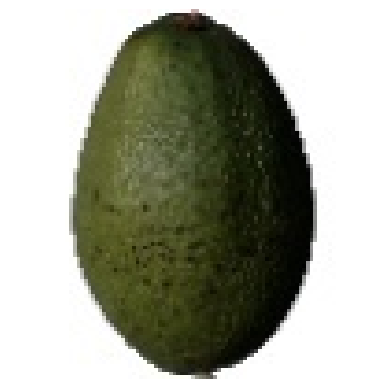

1/1 [==============================] - 0s 92ms/step
Image: Avocado_16.jpg, Predicted class: Avocado


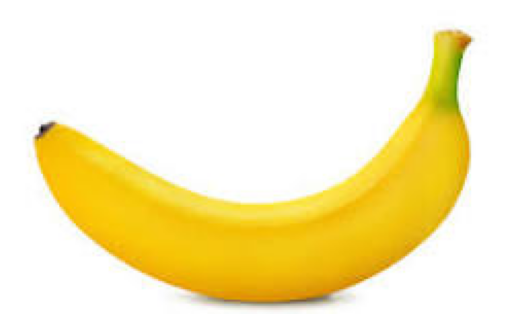

1/1 [==============================] - 0s 98ms/step
Image: banana.jpg, Predicted class: Banana


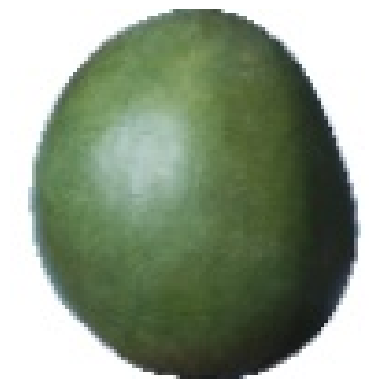

1/1 [==============================] - 0s 149ms/step
Image: Mango_182.jpg, Predicted class: Mango


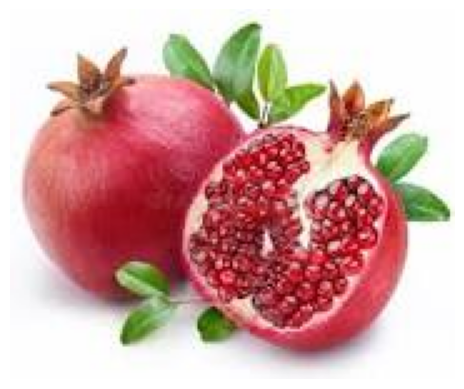

1/1 [==============================] - 0s 129ms/step
Image: pomegranate.jpg, Predicted class: Pomegranate


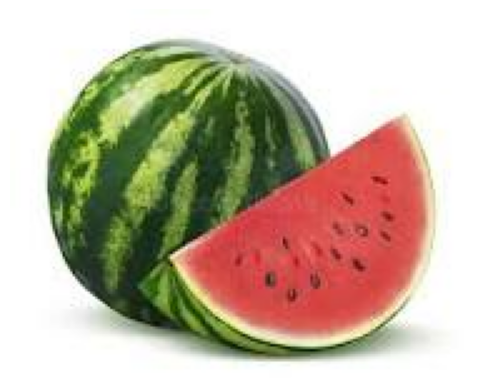

1/1 [==============================] - 0s 94ms/step
Image: watermelon.jpg, Predicted class: Watermelon


In [23]:
import numpy as np
from tensorflow.keras.preprocessing import image
from PIL import Image
import matplotlib.pyplot as plt
import os

# Define a function to preprocess an image before making predictions
def preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Normalize pixel values to [0, 1]
    return img_array

# Directory containing multiple images
images_dir = 'eval'

# List all files in the directory
image_files = [f for f in os.listdir(images_dir) if os.path.isfile(os.path.join(images_dir, f))]

# Make predictions for each image
for image_file in image_files:
    # Path to the current image
    image_path = os.path.join(images_dir, image_file)

    # Preprocess the image
    preprocessed_image = preprocess_image(image_path)

    # Load and display the image
    img = Image.open(image_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    # Make predictions
    predictions = model.predict(preprocessed_image)
    predicted_class = np.argmax(predictions[0])

    class_names = list(train_generator.class_indices.keys())
    predicted_label = class_names[predicted_class]

    # Display the result
    print(f"Image: {image_file}, Predicted class: {predicted_label}")
